# GIS Exercise 8: Plotting Locations of CoAgMet and Northern Water Weather Stations in CO using Python

## For WR514: GIS and Data Analysis in Natural Resources

Created by A.J. Brown on 14 April 2023

COlorado AGricultural Meteorological nETwork — COAGMET (https://coagmet.colostate.edu/) and Northern Water operates a network of agricultural weather stations around the state of Colorado. The data from these stations lets users calculate Evapotranspiration (ET) values to model water use for various crops, and determine current weather conditions accurately.
This exercise will plot the location of each weather station in CO, colored by owner type.

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 22})

## Import weather station data from csv

In [11]:
df = pd.read_csv(r"C:\Users\AJ-CPU\Documents\GitHub\WR514-GIS-Exercises\Exercise-8\coagmet-meta.csv")
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

df

,Id,Station name,Location,Latitude,Longitude,Elev. (ft),First obs,Last obs,Irrigation type,Owner
0,AKR02,Akron,USDA-ARS-GPRC,40.1548,-103.1420,4537,33786,Current,Dry land,CoAgMet
1,ALT01,Ault,1 mi SE Ault,40.5690,-104.7200,4910,33680,Current,Fully irrigated,CoAgMet
2,AVN01,Avondale,1 mi SE Avondale,38.2056,-104.3294,4630,33759,Current,Fully irrigated,CoAgMet
3,BLA01,Blanca,8 mi SW Blanca,37.3905,-105.5570,7755,35485,Current,Dry land,CoAgMet
4,BNV01,Buena Vista,CDW Area SW of Buena Vista,38.8315,-106.1290,7900,40463,Current,Partial irrigation,CoAgMet
...,...,...,...,...,...,...,...,...,...,...
136,OVD01,Ovid,1/2 mile north of Revere Elementary School,40.9700,-102.2710,3575,34335,Current,Fully irrigated,Northern Water
137,SHM01,Shadow Mountain,Shadow Mountain Reservoir Dam,40.2074,-105.8420,8387,40801,Current,Dry land,Northern Water
138,STG02,Sterling,1/4 mile northwest of CR 24 & HWY 6,40.5833,-103.1420,3950,34335,Current,Fully irrigated,Northern Water
139,WGP01,Windy Gap,1 mile northwest of HWY 40 & HWY 34,40.0970,-105.9720,7858,36411,Current,Dry land,Northern Water


## Import CO Data and Plot

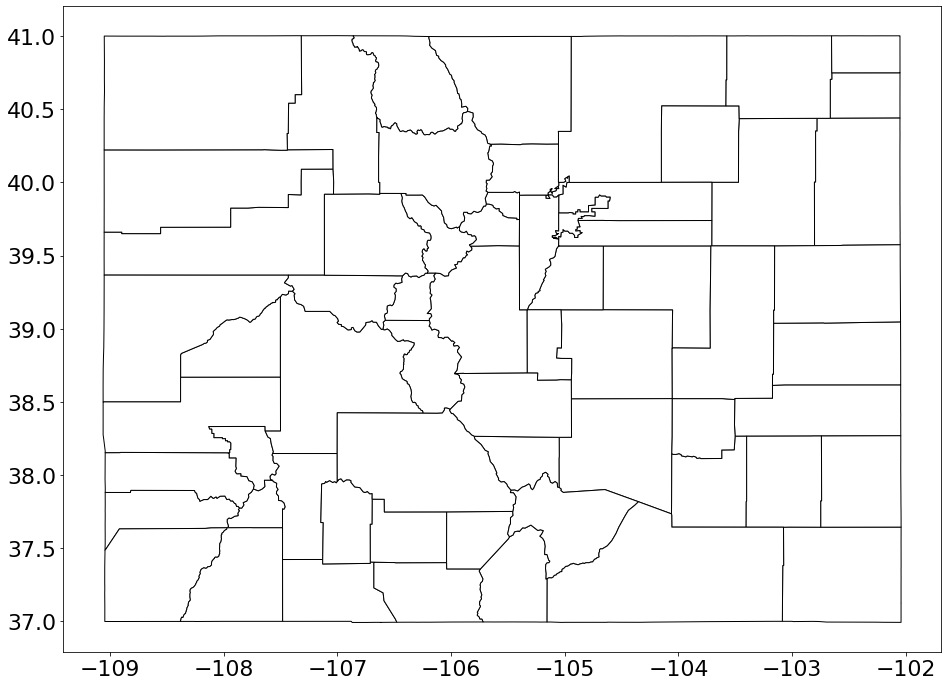

In [66]:
# convert pandas df to geopandas df
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
# Set coordinate system to WGS 84 decimal degrees: https://geopandas.org/en/stable/docs/user_guide/projections.html
gdf = gdf.set_crs('epsg:4326', allow_override=True)

# Call State Boundaries from US Census
state_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_state_5m.zip")

# Call CO County Boundaries from US Census
county_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip")
county_df = county_df.query("STATEFP == '08'")

fig, ax = plt.subplots(1,1)
county = county_df.plot(ax=ax, edgecolor="black", color="white")
plt.savefig('co.png')
plt.tight_layout()

## Plot Station Points

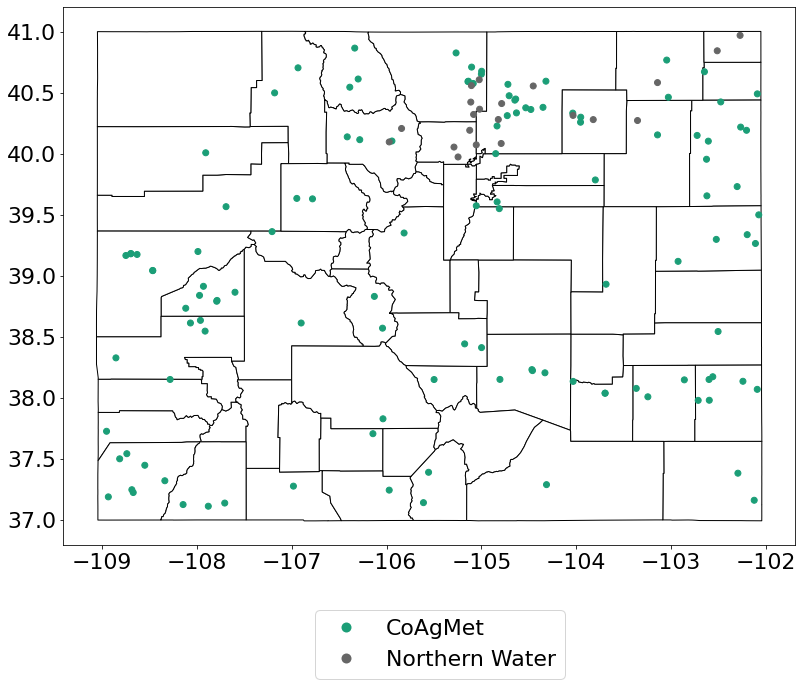

In [68]:
# Initialize Point map (optional, default will be to use interactive map below instead)
fig, ax = plt.subplots(1,1)
county = county_df.plot(ax=ax, edgecolor="black", color="white")
gdf.plot(ax=county, column=gdf['Owner'], legend=True, legend_kwds={'bbox_to_anchor': (0.7, -0.1)}, cmap='Dark2')
plt.savefig('stations.png')
plt.tight_layout()